## LLM Prompting In-class walkthrough

Includes:
a) Walkthrough of prompting principles and examples.
b) Also includes In-class exercise for a bonus 2% credit towards overall grade.

(Part of LLM Lectures at UW, ECE and designed by Dr. Karthik Mohan.)

## Install Libraries

In [1]:
!pip3 install openai
!pip3 install python-dotenv

## Connect Google Colab to your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

import os
print(os.system('ls'))

#os.chdir(os.curdir + "/drive/MyDrive/Colab_Demo_ChatGPT")
os.chdir(os.curdir + "/drive/MyDrive/Colab_Notebooks_LLM_2023")

Mounted at /content/drive/
0


## OPEN AI ACCESS

In [ ]:
import openai
import os

open_ai_key_file = "open_ai_key.txt"  # Your OPEN AI Key in this file
with open(open_ai_key_file, "r") as f:
    for line in f:
        OPENAI_KEY = line
        break

from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())

openai.api_key = OPENAI_KEY

## Response from OPEN AI

In [64]:
from openai import OpenAI
from typing import Union, Generator

client = OpenAI(api_key=OPENAI_KEY)


def get_completion(
    prompt: str, model: str = "gpt-4o-mini", useStream: bool = False
) -> Union[str, Generator[str, None, None]]:
    """
    Returns either a full completion (string) or a generator that yields chunks if streaming is enabled.
    """
    message = {"role": "user", "content": prompt}

    # For streaming case, use a nested generator function so that this function remains non-generator
    if useStream:
        response = client.chat.completions.create(
            model=model, messages=[message], stream=True
        )

        def stream_generator():
            print("Streaming response...")
            for chunk in response:
                # Only yield if there's content in this chunk
                if chunk.choices[0].delta.content is not None:
                    yield chunk.choices[0].delta.content

        return stream_generator()

    else:
        print("Non-streaming response...")
        response = client.chat.completions.create(
            model=model, messages=[message], stream=False
        )
        return response.choices[0].message.content


def get_completion_reasoning(
    prompt: str, model: str = "o1-mini", useStream: bool = False
) -> Union[str, Generator[str, None, None]]:
    """
    Returns either a full completion (string) or a generator that yields chunks if streaming is enabled.
    """
    message = {"role": "user", "content": prompt}

    # For streaming case, use a nested generator function so that this function remains non-generator
    if useStream:
        if "o3" in model:
            response = client.chat.completions.create(
                model=model, reasoning_effort="low", messages=[message], stream=True
            )
        else:
            response = client.chat.completions.create(
                model=model, messages=[message], stream=True
            )

        def stream_generator():
            print("Streaming response...")
            for chunk in response:
                # Only yield if there's content in this chunk
                if chunk.choices[0].delta.content is not None:
                    yield chunk.choices[0].delta.content

        return stream_generator()

    else:
        print("Non-streaming response...")
        if "o3" in model:
            response = client.chat.completions.create(
                model=model, reasoning_effort="low", messages=[message], stream=False
            )
        else:
            response = client.chat.completions.create(
                model=model, messages=[message], stream=False
            )
        return response.choices[0].message.content

## Visual Steps Task based on a given example

In [65]:
prompt = f"""Make the bed steps are :
put the sheet on the bed
insert the quilt into the quilt cover
put the quilt on the bed
insert the pillow into the pillow cover
put the pillow on the bed.   Similarly, provide the steps of "fix my flat tire" that are visually seen and number them. No need to explain the steps."""

model = "gpt-4o"
response = get_completion(prompt, model, True)
print("model = ", model)
for chunk in response:
    print(chunk, end="", flush=True)
print("\n\n")

model = "gpt-4o-mini"
print("model = ", model)
print("\n")
response = get_completion(prompt, model, True)
for chunk in response:
    print(chunk, end="", flush=True)
print("\n\n")

model = "o1-mini"
print("model = ", model)
print("\n")
response = get_completion_reasoning(prompt, model, True)
for chunk in response:
    print(chunk, end="", flush=True)

model =  gpt-4o
Streaming response...
1. Remove the hubcap or wheel cover, if necessary.
2. Loosen the lug nuts with a wrench.
3. Place the jack under the vehicle's jacking point.
4. Lift the vehicle with the jack until the flat tire is off the ground.
5. Remove the loosened lug nuts completely.
6. Take the flat tire off the wheel hub.
7. Place the spare tire onto the wheel hub.
8. Hand-tighten the lug nuts onto the spare tire.
9. Lower the vehicle back to the ground slowly.
10. Tighten the lug nuts fully in a crisscross pattern.
11. Replace the hubcap or wheel cover, if necessary.


model =  gpt-4o-mini


Streaming response...
1. Gather necessary tools: jack, lug wrench, spare tire.
2. Find a safe location to change the tire.
3. Loosen the lug nuts slightly with the lug wrench.
4. Place the jack under the vehicle’s designated lift point.
5. Raise the vehicle with the jack until the tire is off the ground.
6. Remove the loosened lug nuts completely.
7. Take off the flat tire.
8. Place 

In [66]:
model = "gpt-4o-mini"
useStream = False
print("model = ", model, "useStream = ", useStream)
print("\n")
response = get_completion(prompt=prompt, model=model, useStream=useStream)
print(response)
print("\n")

model =  gpt-4o-mini useStream =  False


Non-streaming response...
1. Find a safe location to pull over.
2. Gather the necessary tools (jack, wrench, spare tire).
3. Loosen the lug nuts on the flat tire.
4. Use the jack to lift the vehicle.
5. Remove the flat tire.
6. Place the spare tire onto the wheel hub.
7. Tighten the lug nuts on the spare tire.
8. Lower the vehicle back to the ground.
9. Fully tighten the lug nuts.
10. Pack up the flat tire and tools.




## Prompt for KeyWord Extraction

In [67]:
def get_keywords_from_text(text_list):
    if not isinstance(text_list, list):
        text_list = [text_list]

    num_strings = len(text_list)

    prompt = (
        f"""
        Here's a list of """
        + str(num_strings)
        + f""" string given by the text delimited by 3 quotes: ```{text_list}```.
        For each string in the list, generate at least two key words and at most 3 key words.
        Return result as a list.
        The key word should be relevant to the text
        and each key word can capture a different popular theme of interest for wisdom
        seekers.
        The key word doesn't have to be present in the text. Also key word shouldn't
        have a space in it.
        """
    )

    responses = get_completion(prompt)

    return responses

In [ ]:
text = """
    BECOMING DEFENSELESS

    Whenever a boundary is broken, it creates some fear. The fear creates dislike. This dislike puts us back in the boundary. And to keep yourself in the boundary you put forth defenses. When you try to defend your position, it is such a stress, isn't it? And every time you try to defend your position it makes you more and more weak.

    On the path, people even use the Knowledge as a defense against criticism! Don't use Knowledge as a defense.

    The Knowledge is like an umbrella for you -- a shelter, not a weapon. Of course, sometimes "Don't use Knowledge as a weapon" becomes an excuse not to be in Knowledge! (Laughter)

    I say, drop all your defenses. Anybody can make a mistake. Even you!

    Don't defend your mistakes. Just accept them and move on. When you are totally defenseless, that's when you'll be strong.

    """

print(get_keywords_from_text(text))

Non-streaming response...
Based on the provided text, here are the key words relevant to the themes of wisdom and personal growth:

1. **Vulnerability**
2. **Acceptance**
3. **Strength**

The keywords encapsulate themes of opening oneself to experiences, embracing mistakes, and finding true strength through a defenseless state.


## Download and Load Data

In [71]:
def load_all_data(web_link):
  """
  Each data point/text is one page from a book
  """
  path = "wisdom"
  files = os.listdir(path)

  text_dict = {}
  for file in files:
    with open(path + "/" + file, "r") as f:
      sheet = f.readlines()
      sheet = [line.strip("\n") for line in sheet]
      sheet = [line for line in sheet if line]
      # Return the sheet as a single string
      text_dict[file.split(".")[0]] = " ".join(sheet)

  return text_dict

def load_all_data_from_path(path):

  text_dict = {}
  with open(path, "r") as f:
    index = 0
    for line in f:
      text_dict[index] = line.strip("\n")
      index += 1

  return text_dict

# Download data to "quotes.txt" file
!wget https://gist.githubusercontent.com/robatron/a66acc0eed3835119817/raw/77493d3ddf69fbd9d69997e22e1a7c6c70c8bdf2/quotes.txt
path = "quotes.txt"
text_dict = load_all_data_from_path(path)

--2025-02-07 15:50:38--  https://gist.githubusercontent.com/robatron/a66acc0eed3835119817/raw/77493d3ddf69fbd9d69997e22e1a7c6c70c8bdf2/quotes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10641 (10K) [text/plain]
Saving to: ‘quotes.txt.2’

quotes.txt.2        100%[===================>]  10.39K  --.-KB/s    in 0s      

2025-02-07 15:50:38 (209 MB/s) - ‘quotes.txt.2’ saved [10641/10641]



In [72]:
text_dict

{0: 'If you want to achieve greatness stop asking for permission. ~Anonymous',
 1: 'Things work out best for those who make the best of how things work out. ~John Wooden',
 2: 'To live a creative life, we must lose our fear of being wrong. ~Anonymous',
 3: 'If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn',
 4: "Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous",
 5: 'Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success. ~Swami Vivekananda',
 6: 'All our dreams can come true if we have the courage to pursue them. ~Walt Disney',
 7: 'Good things come to people who wait, but better things come to those who go out and get them. ~Anonymous',
 8: 'If you do what you always did, you will get what you always got. ~Anonymou

In [73]:
!ls

LLM_prompting.ipynb  open_ai_key.txt  quotes.txt


## Generate Keywords for Hundreds of Docs

In [74]:
import time


def generate_keywords_for_single_text(text):

    prompt = f"""
  Here's a text  de-limited by 3 quotes: ```{text}```.
  Generate three distinct keywords that capture the most important topics in the text.
  The key word doesn't have to be present in the text. Also key word shouldn't
  have a space in it. Make sure the key word is just one word and not two words joined.
  """

    # Make sure the key word is just one word and not two words joined.

    response = get_completion(prompt)

    return response


def generate_keywords_for_all_text(text_dict):

    keywords_dict = {}
    count = 0
    count_max = 17
    for key in text_dict:
        text = text_dict[key]
        response = generate_keywords_for_single_text(text)
        keywords_dict[key] = response
        print("key = ", key)
        print(text)
        print(response)
        print("\n")
        time.sleep(0.3)
        count += 1
        if count > count_max:
            break

## Application 1:
## Generating Keywords for Hundreds of texts

In [75]:
generate_keywords_for_all_text(text_dict)

Non-streaming response...
key =  0
If you want to achieve greatness stop asking for permission. ~Anonymous
1. Greatness
2. Ambition
3. Empowerment


Non-streaming response...
key =  1
Things work out best for those who make the best of how things work out. ~John Wooden
1. Positivity  
2. Resilience  
3. Adaptability  


Non-streaming response...
key =  2
To live a creative life, we must lose our fear of being wrong. ~Anonymous
1. Creativity  
2. Fear  
3. Growth  


Non-streaming response...
key =  3
If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn
1. Risk
2. Ordinary
3. Success


Non-streaming response...
key =  4
Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous
Trust, Risk, Acceptance


Non-streaming response...
key =  5
Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and 

## Application 2:
## Data Augmentation: Generate questions for the text to form Q,A pairs that can be used for model training

In [76]:
def generate_questions_for_single_text(text):

    prompt = f"""
  Here's a text  de-limited by 3 quotes: ```{text}```.
  Generate two distinct questions whose answer would be the text.
  Limit the length of question to 100 characters
  and keep the questions practical and relevant to people's lives. Also make
  the question a good match to the text as a answer. One question should be something
  a 5 year old wold ask and the second question is something a mature adult would ask.
  """

    response = get_completion(prompt)

    return response


def generate_questions_for_all_knowledge_sheets(text_dict):

    questions_dict = {}
    count = 0
    count_max = 9
    for key in text_dict:
        text = text_dict[key]
        success = False
        while not success:
            try:
                response = generate_questions_for_single_text(text)
            except:
                print("Going to try again...")
                time.sleep(0.1)
                continue
            success = True
        questions_dict[key] = response
        print("key = ", key)
        print(response)
        print(text)
        print("\n")
        count += 1
        if count > count_max:
            break

In [77]:
generate_questions_for_all_knowledge_sheets(text_dict)

Non-streaming response...
key =  0
1. Why shouldn't I wait for someone to tell me I can be great?  
2. What advice can you give about pursuing my goals without seeking approval?  
If you want to achieve greatness stop asking for permission. ~Anonymous


Non-streaming response...
key =  1
1. Why is it important to be positive when things don’t go as planned?  
2. What does it mean to adapt and succeed in challenging situations?
Things work out best for those who make the best of how things work out. ~John Wooden


Non-streaming response...
key =  2
1. Why is it important to try new things even if we might make mistakes?  
2. How can overcoming the fear of failure enhance our creativity and personal growth?
To live a creative life, we must lose our fear of being wrong. ~Anonymous


Non-streaming response...
key =  3
1. Why should I try new things instead of just doing what everyone else does?  
   
2. What does it mean to take risks in pursuit of a fulfilling life?
If you are not willing

## In-Class Exercise 2 (Bonus 2% of overall class grade for completion)

We will now do an in-class exercise that explores the ideas of:

a) prompt engineering
b) data augmentation and
c) evaluate SBERT baseline with prompt-engineering based data augmentation.

Submission:
You can submit the jupyter notebook of this class exercise as a submission on canvas.
Each step below should be in a separate cell of jupyter notebook and should show the results post execution of the cell (this assists ease of grading).

Steps to execute for ICE:

1) Run all cells in the notebook and verify that they all work and you are getting results as expected. If not - fix any bugs, permission issues, etc.

2) Pick 5 classes for the "text reference" used in this notebook or for your own ".txt" file that are relevant. For example for this text, maybe I would pick 5 classes as follows: a) time management b) success c) persistence d) courage e) growth
You can also ask gpt to return 5 topics that it thinks encapsulate all sentences in the text

3) Ask GPT (any version you want to use) to annotate each sentence in the ".txt" file with one of the 5 classes you identified in step 2. You can use a suitable prompt for this.

4) Use SBERT to make predictions for each of the sentences in ".txt" file - The prediction should be one of the 5 classes identified in step 2.

5) Generate a heat map of the confusion matrix based on SBERT predictions and the ground truth you indentified in step 3.

6) How well is SBERT doing on your annotated data?

- Define the Five Classes

In [78]:
# Define the five classes to be used for annotation and prediction
classes = ['time_management', 'success', 'persistence', 'courage', 'growth']
print('Selected classes:', classes)

Selected classes: ['time_management', 'success', 'persistence', 'courage', 'growth']


- Annotate Each Sentence Using GPT

In [79]:
def annotate_sentence(sentence: str, class_labels: list) -> str:
    """
    Annotate a sentence with one of the provided classes using GPT.
    The function sends a prompt to GPT and expects a one-word response matching one of the class_labels.
    """
    prompt = (
        f'Please classify the following sentence into one of these categories: {", ".join(class_labels)}. '
        f'Sentence: "{sentence.strip()}". '
        'Respond with only the class name.'
    )
    # Using non-streaming mode so that we get a direct string answer
    annotation = get_completion(prompt, model='gpt-4o-mini', useStream=False)
    return annotation.strip().lower()

# Create a dictionary to store the GPT annotations for each sentence
annotations = {}
for key, sentence in text_dict.items():
    annotated_class = annotate_sentence(sentence, classes)
    annotations[key] = annotated_class
    print(f'Sentence {key}: {sentence}')
    print(f'Annotated as: {annotated_class}\n')

Non-streaming response...
Sentence 0: If you want to achieve greatness stop asking for permission. ~Anonymous
Annotated as: success

Non-streaming response...
Sentence 1: Things work out best for those who make the best of how things work out. ~John Wooden
Annotated as: growth

Non-streaming response...
Sentence 2: To live a creative life, we must lose our fear of being wrong. ~Anonymous
Annotated as: growth

Non-streaming response...
Sentence 3: If you are not willing to risk the usual you will have to settle for the ordinary. ~Jim Rohn
Annotated as: courage

Non-streaming response...
Sentence 4: Trust because you are willing to accept the risk, not because it's safe or certain. ~Anonymous
Annotated as: courage

Non-streaming response...
Sentence 5: Take up one idea. Make that one idea your life - think of it, dream of it, live on that idea. Let the brain, muscles, nerves, every part of your body, be full of that idea, and just leave every other idea alone. This is the way to success.

- Use SBERT to Predict the Class for Each Sentence

In [80]:
import numpy as np
from sentence_transformers import SentenceTransformer

# Load a pre-trained SBERT model
model_sbert = SentenceTransformer('all-MiniLM-L6-v2')

def predict_class_sbert(sentence: str, class_labels: list) -> str:
    """
    Predict the class for a sentence using SBERT embeddings and cosine similarity.
    """
    # Compute the embedding for the sentence
    sent_embed = model_sbert.encode(sentence)
    # Compute embeddings for the class labels (using the class word itself)
    class_embeds = model_sbert.encode(class_labels)
    # Compute cosine similarity for each class
    similarities = [
        np.dot(sent_embed, class_embeds[i]) / (np.linalg.norm(sent_embed) * np.linalg.norm(class_embeds[i]))
        for i in range(len(class_labels))
    ]
    best_index = np.argmax(similarities)
    return class_labels[best_index]

# Predict the class for each sentence using SBERT
sbert_predictions = {}
for key, sentence in text_dict.items():
    predicted_class = predict_class_sbert(sentence, classes)
    sbert_predictions[key] = predicted_class
    print(f'Sentence {key} predicted as: {predicted_class}')

2025-02-07 15:56:41.038754: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-07 15:56:41.091969: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-07 15:56:41.092008: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-07 15:56:41.092022: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 15:56:41.110536: I tensorflow/core/platform/cpu_feature_g

Sentence 0 predicted as: success
Sentence 1 predicted as: success
Sentence 2 predicted as: courage
Sentence 3 predicted as: courage
Sentence 4 predicted as: courage
Sentence 5 predicted as: success
Sentence 6 predicted as: courage
Sentence 7 predicted as: success
Sentence 8 predicted as: persistence
Sentence 9 predicted as: success
Sentence 10 predicted as: persistence
Sentence 11 predicted as: success
Sentence 12 predicted as: success
Sentence 13 predicted as: success
Sentence 14 predicted as: success
Sentence 15 predicted as: persistence
Sentence 16 predicted as: success
Sentence 17 predicted as: time_management
Sentence 18 predicted as: success
Sentence 19 predicted as: courage
Sentence 20 predicted as: success
Sentence 21 predicted as: success
Sentence 22 predicted as: persistence
Sentence 23 predicted as: courage
Sentence 24 predicted as: courage
Sentence 25 predicted as: courage
Sentence 26 predicted as: success
Sentence 27 predicted as: success
Sentence 28 predicted as: growth
S

- Generate a Confusion Matrix and a Heat Map

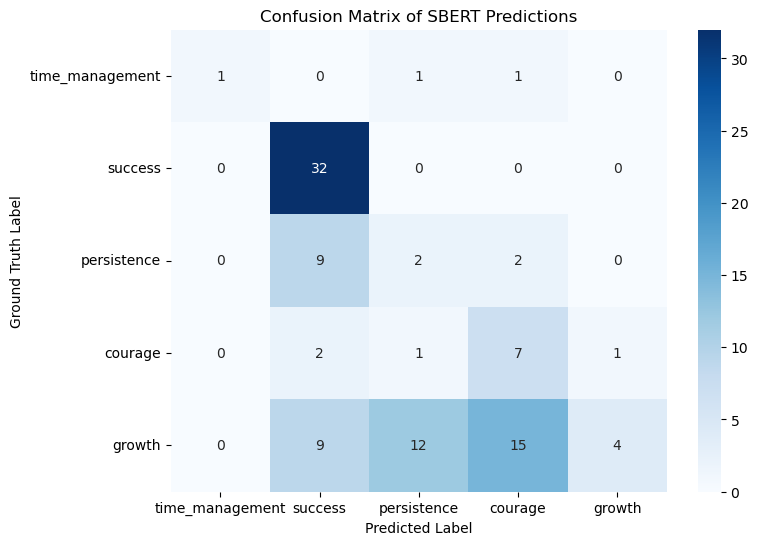

                 precision    recall  f1-score   support

time_management       0.28      0.64      0.39        11
        success       0.80      0.10      0.18        40
    persistence       0.12      0.15      0.14        13
        courage       0.62      1.00      0.76        32
         growth       1.00      0.33      0.50         3

       accuracy                           0.46        99
      macro avg       0.56      0.44      0.39        99
   weighted avg       0.60      0.46      0.39        99



In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Prepare lists of labels sorted by key (assuming keys are numeric)
ground_truth = [annotations[key] for key in sorted(annotations.keys())]
predictions = [sbert_predictions[key] for key in sorted(sbert_predictions.keys())]

# Compute the confusion matrix
cm = confusion_matrix(ground_truth, predictions, labels=classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('Ground Truth Label')
plt.title('Confusion Matrix of SBERT Predictions')
plt.show()

# Print a full classification report
print(classification_report(ground_truth, predictions, target_names=classes))

- Calculate the Overall Accuracy

In [82]:
accuracy = np.mean(np.array(ground_truth) == np.array(predictions))
print('SBERT Classification Accuracy: {:.2f}%'.format(accuracy * 100))

SBERT Classification Accuracy: 46.46%


### SBERT Performance Analysis

1. **Overall Accuracy**
- The model achieved 46.46% accuracy on the 5-class classification task
- This is notably better than random guessing (20%), but still shows room for improvement

2. **Class-specific Performance**
- **Success**: High precision (0.80) but low recall (0.10), suggesting conservative but accurate predictions
- **Courage**: Strong recall (1.00) with moderate precision (0.62), indicating good detection but some false positives
- **Growth**: Perfect precision (1.00) but low recall (0.33), showing very selective but accurate predictions
- **Time_management** and **Persistence**: Generally weaker performance across metrics

3. **Key Observations**
- The confusion matrix shows significant misclassification between related concepts
- Most misclassifications occur with 'success' and 'courage' categories
- The model struggles with distinguishing between semantically similar categories

4. **Conclusion**
While SBERT shows promise with certain categories, its overall performance (46.46%) suggests that simple embedding similarity might not be sufficient for this nuanced classification task. The model performs best when categories are semantically distinct but struggles with overlapping concepts.
